# POSTTEST 5 KECERDASAN BUATAN
---
(*2109106063* - Zahra Salsabila - B121)

## Melihat Data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
df = pd.concat([train_df, test_df])
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2629,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D
2630,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2631,467946,Female,Yes,42,Yes,Artist,0.0,Low,2.0,Cat_6,A
2632,467948,Female,No,19,No,Healthcare,0.0,Low,3.0,Cat_6,A


## Melakukan Data Cleaning

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
# Membuat imputer untuk mengganti nilai null pada attribut dengan nilai mean
float_imputer = SimpleImputer(missing_values = pd.NA, strategy = 'mean')
df[['Work_Experience', 'Family_Size']] = float_imputer.fit_transform(df[['Work_Experience', 'Family_Size']])
# Membuat imputer untuk mengganti nilai null pada attribut dengan nilai modus
text_imputer = SimpleImputer(missing_values = pd.NA, strategy = 'most_frequent')
df[['Ever_Married', 'Graduated', 'Profession', 'Var_1']] = text_imputer.fit_transform(df[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])
# Menghapus nilai duplikat
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Menghapus Kolom Atribut ID

In [7]:
del df['ID']

## Melakukan Ordinal Encoding Pada Atribut Gender, Ever_Married, Graduated, Profession, Spending_Score, Var_1 

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
encoder = OrdinalEncoder()
df[["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1"]] = encoder.fit_transform(df[["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1"]])

## Mengubah Tipe Data Atribut Work_Experience dan Family_Size Menjadi Integer

In [10]:
df[['Work_Experience','Family_Size']] = df[['Work_Experience','Family_Size']].astype(int)

In [11]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1.0,0.0,22,0.0,5.0,1,2.0,4,3.0,D
1,0.0,1.0,38,1.0,2.0,2,0.0,3,3.0,A
2,0.0,1.0,67,1.0,2.0,1,2.0,1,5.0,B
3,1.0,1.0,67,1.0,7.0,0,1.0,2,5.0,B
4,0.0,1.0,40,1.0,3.0,2,1.0,6,5.0,A
...,...,...,...,...,...,...,...,...,...,...
2622,1.0,0.0,29,0.0,5.0,9,2.0,4,5.0,B
2623,0.0,0.0,35,1.0,1.0,1,2.0,1,5.0,A
2624,0.0,0.0,53,1.0,3.0,2,2.0,2,5.0,C
2625,1.0,1.0,47,1.0,4.0,1,1.0,5,3.0,C


## A. Supervised Learning
---

### A1. Implementasi Metode
#### Support Vector Classifier

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

- Split Data

In [13]:
# Split data ke dalam feature dan label
X = df[['Spending_Score','Var_1']]
y = df['Segmentation']
y = np.where(y == 'C', 1, -1)
# Split data menjadi training set dan tes set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

- Membuat Model, Melatih Model, dan Memprediksi Data Test  

In [14]:
# Membuat model SVM
model = SVC(kernel='rbf',degree=5, random_state=42)
# Melatih model 
model.fit(X_train, y_train)
# Memprediksi data test
y_pred = model.predict(X_test)

- Melihat Akurasi Model Pada Data Test

In [15]:
accuracy = model.score(X_test, y_pred)
print('Akurasi Data Test: ', accuracy)

Akurasi Data Test:  1.0


- Menampilkan Grafik

In [16]:
# Mengambil nilai support vector
sv = model.support_vectors_

C:\Users\ADMIN\venv_B1-21\Zahra_063\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


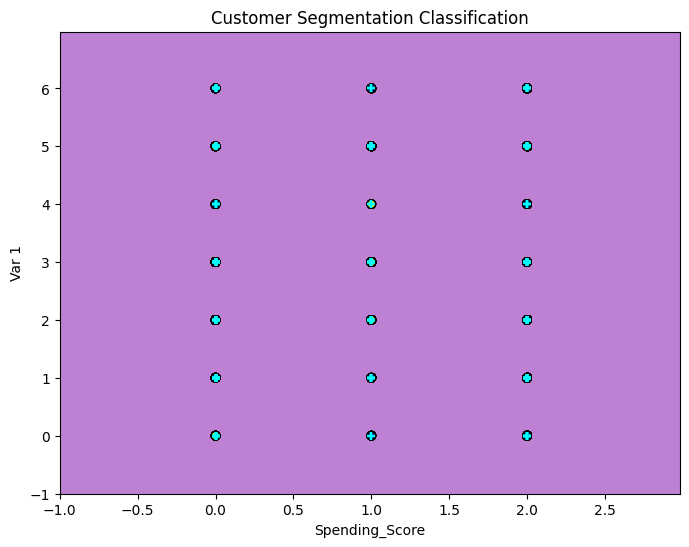

In [22]:
x_min, x_max = X['Spending_Score'].min() - 1, X['Spending_Score'].max() + 1
y_min, y_max = X['Var_1'].min() - 1, X['Var_1'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X['Spending_Score'], X['Var_1'], c=y, edgecolors='k', cmap='plasma')
plt.scatter(sv[:, 0], sv[:, 1], s = 40, label = 'support_vectors', marker = '+', color = 'cyan')
plt.xlabel('Spending_Score')
plt.ylabel('Var 1')
plt.title('Customer Segmentation Classification')
plt.show()

### A2. Hasil Prediksi (Klasifikasi)
1. #### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

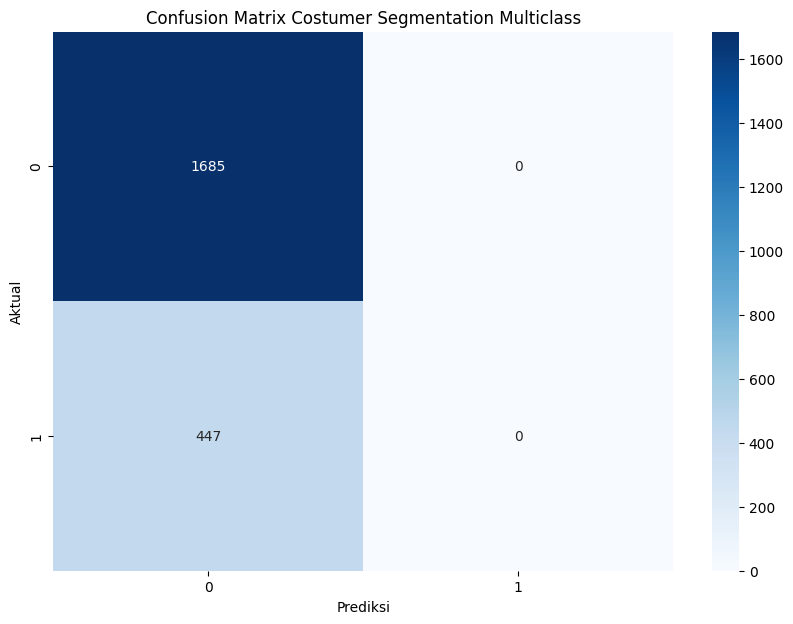

In [19]:
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Costumer Segmentation Multiclass')
plt.show()

Dari grafik tersebut dapat diketahui bahwa nilai **True Negative** untuk memprediksi apakah data segmentasi tersebut masuk ke dalam segmentasi C ada sebanyak 1685 data, sementara untuk nilai **False Positive** ada sebanyak 447 data. Lalu untuk nilai **True Positive** dan **False Negative** ada sebanyak 0 data

2. #### Classification Report

In [20]:
from sklearn.metrics import classification_report as cr

In [21]:
report = cr(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.79      1.00      0.88      1685
           1       0.00      0.00      0.00       447

    accuracy                           0.79      2132
   macro avg       0.40      0.50      0.44      2132
weighted avg       0.62      0.79      0.70      2132



C:\Users\ADMIN\venv_B1-21\Zahra_063\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\venv_B1-21\Zahra_063\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\venv_B1-21\Zahra_063\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dari data di atas, dapat diketahui bahwa nilai akurasi keseluruhan dari data untuk memprediksi bahwa data tersebut masuk ke dalam segmentasi C sebesar 79%

- Melihat nilai MAE, MSE, RMSE, R-Squared(R^2)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import sqrt

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"""Hasil:
MAE: {mae}
MSE: {mse}
RMSE: {rmse}
R2: {r2}""")

Hasil:
MAE: 0.41932457786116323
MSE: 0.8386491557223265
RMSE: 0.9157778965023814
R2: -0.2652818991097923


## B. Unsupervised Learning
### B1. Implementasi metode K-Means

In [26]:
from sklearn.cluster import KMeans

In [ ]:
X_K = df